# 1. Load data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_passengers = pd.read_csv("./data/train.csv")

# 2. Preprocessing & feature engineering

In [4]:
import matplotlib.pyplot as plt
import scipy
from statsmodels.graphics.gofplots import qqplot

In [5]:
def test_normality(data, bins):
    
    _, p_value_shapiro = scipy.stats.shapiro(data)
    _, p_value_normaltest = scipy.stats.normaltest(data)
    _, p_value_kstest = scipy.stats.kstest(data, 'norm')
    result_anderson = scipy.stats.anderson(data)
    
    print("Shapiro: {}".format(p_value_shapiro))
    print("Normal test: {}".format(p_value_normaltest))
    print("Kstest: {}".format(p_value_kstest))
    print("Anderson: {}".format(result_anderson))
    
    plt.hist(data, bins=bins)
    qqplot(data, line='s')
    plt.show()

In [6]:
df_passengers.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
print("There is {} rows and {} columns in the dataframe".format(df_passengers.shape[0], df_passengers.shape[1]))

There is 891 rows and 12 columns in the dataframe


## 2.1. Passenger id

Passenger id is nothing more than the id in the dataframe, it does not bring any information, we can drop it

In [8]:
df_passengers.drop(labels=["PassengerId"], axis=1, inplace=True)

## 2.2. P class

P class is the ticket class, which can be see as a proxy for socio-economic status

In [9]:
df_passengers.Pclass.unique()

array([3, 1, 2], dtype=int64)

There is 3 differents categories, let get dummies from

In [10]:
df_passengers = pd.get_dummies(data=df_passengers, columns=["Pclass"])

## 2.3. Name

For the moment, we will drop Name and see after if NLP can help us to extract another features

In [11]:
df_passengers.drop(labels=["Name"], axis=1, inplace=True)

## 2.4. Sex

In [12]:
df_passengers.Sex.unique()

array(['male', 'female'], dtype=object)

There is 2 differents categories, let get dummies from

In [13]:
df_passengers = pd.get_dummies(data=df_passengers, columns=["Sex"], drop_first=True)

## 2.5. Age

Age is integer based. For children less than one years old, Age is fractionnal. If the Age is estimated, Age is in the format xx.5

In [14]:
df_passengers.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

First, let's see nan

In [15]:
print("There is {} rows without age".format(df_passengers.Age.isna().sum()))

There is 177 rows without age


Second, let's see the number of passenger with estimated age

In [16]:
print("There is {} rows with estimated age".format(df_passengers[df_passengers.Age.notna()].Age.apply(lambda x: (x - int(x)) == 0.5).sum()))

There is 18 rows with estimated age


For the moment, we will estimated missing value by the mean of the value which are present in the dataframe

In [17]:
mean_age = df_passengers[
    (df_passengers.Age.notna()) & 
    (df_passengers[df_passengers.Age.notna()].Age.apply(lambda x: (x - int(x)) != 0.5))
].Age.mean()

df_passengers.Age = df_passengers.Age.fillna(mean_age)

Let's see if age is Gaussian

Shapiro: 3.366480779852434e-15
Normal test: 1.9732930746086562e-10
Kstest: 2.1112199332947903e-17
Anderson: AndersonResult(statistic=15.460820154545672, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


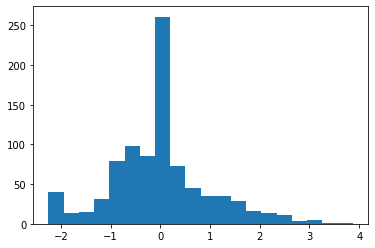

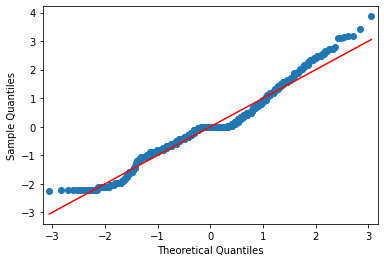

In [18]:
Age = df_passengers.Age
mean_age = Age.mean()
std_age = Age.std()
Age = Age.apply(lambda Age: (Age - mean_age) / std_age)
test_normality(data=Age, bins=20)

Age does not seem to be Gaussian, we will let it like this for the moment

Shapiro: 2.8111664878522832e-14
Normal test: 0.0002951600347859723
Kstest: 9.623500722377819e-14
Anderson: AndersonResult(statistic=14.713819163754351, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


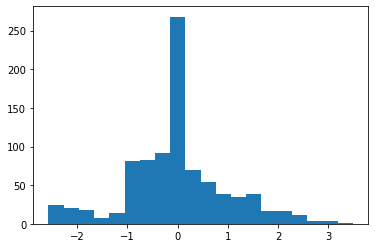

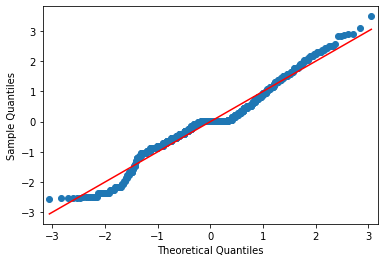

In [19]:
from scipy.stats import yeojohnson

Age = df_passengers.Age
Age, _ = yeojohnson(Age)
mean_age = Age.mean()
std_age = Age.std()
Age = (Age - mean_age) / std_age
test_normality(data=Age, bins=20)

Shapiro: 2.4719099719059702e-14
Normal test: 0.0002736868488636927
Kstest: 1.2196533330261243e-13
Anderson: AndersonResult(statistic=14.818679166332345, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


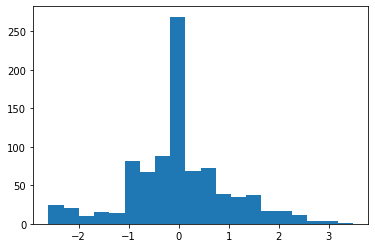

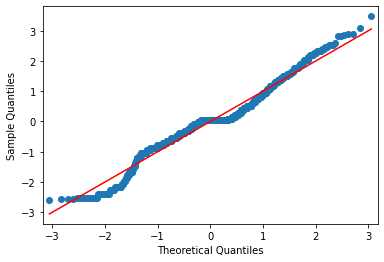

In [20]:
from scipy.stats import boxcox

Age = df_passengers.Age
Age, _ = boxcox(Age)
mean_age = Age.mean()
std_age = Age.std()
Age = (Age - mean_age) / std_age
test_normality(data=Age, bins=20)

We will standardize age

In [21]:
Age = df_passengers.Age
Age, _ = boxcox(Age)
mean_age = Age.mean()
std_age = Age.std()
df_passengers.Age = (Age - mean_age) / std_age

In [22]:
df_passengers.Age.describe()

count    8.910000e+02
mean     7.974666e-17
std      1.000562e+00
min     -2.605495e+00
25%     -5.508727e-01
50%      3.519545e-02
75%      4.407122e-01
max      3.478998e+00
Name: Age, dtype: float64

## 2.6. Sib sp

SibSp is the number of siblings / spouses aboard the Titanic

In [23]:
df_passengers.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Let's create other features from SibSp

In [24]:
df_passengers = df_passengers.merge(
    pd.get_dummies(df_passengers[["SibSp"]], columns=["SibSp"]),
    left_index=True,
    right_index=True
)
for nb_SibSp in [1, 2, 3, 4, 5, 8]:
    df_passengers["Has_at_least_" + str(nb_SibSp) + "_SibSp_onboard"] = df_passengers.SibSp.apply(lambda SibSp: 1 if SibSp >= nb_SibSp else 0)
    
mean_sibsp = df_passengers.SibSp.mean()
std_sibsp = df_passengers.SibSp.std()
df_passengers.SibSp = df_passengers.SibSp.apply(lambda SibSp: (SibSp - mean_sibsp) / std_sibsp)

## 2.7. Parch

Parch is the number of parents / children aboard the Titanic

In [25]:
df_passengers.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [26]:
df_passengers = df_passengers.merge(
    pd.get_dummies(df_passengers[["Parch"]], columns=["Parch"]),
    left_index=True,
    right_index=True
)
for nb_Parch in [1, 2, 3, 4, 5, 6]:
    df_passengers["Has_at_least_" + str(nb_Parch) + "_Parch_onboard"] = df_passengers.Parch.apply(lambda Parch: 1 if Parch >= Parch else 0)
    
mean_parch = df_passengers.Parch.mean()
std_parch = df_passengers.Parch.std()
df_passengers.Parch = df_passengers.Parch.apply(lambda Parch: (Parch - mean_parch) / std_parch)

## 2.8. Ticket

Ticket represent the ticket number

In [27]:
df_passengers.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Ticket does not seem to bring information so let's drop it

In [28]:
df_passengers.drop(labels=["Ticket"], axis=1, inplace=True)

## 2.9. Fare

Fare report the fare of the ticket

In [29]:
df_passengers.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

Shapiro: 1.0789998175301091e-43
Normal test: 3.727091062842147e-197
Kstest: 0.0
Anderson: AndersonResult(statistic=122.16962721459208, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


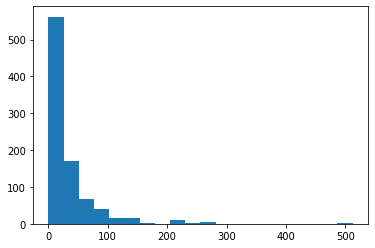

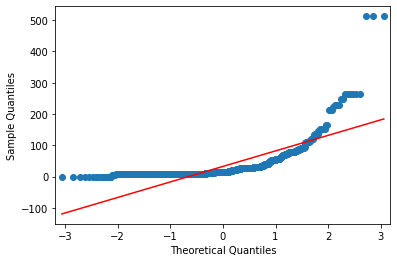

In [30]:
test_normality(data=df_passengers.Fare, bins=20)

Shapiro: 1.7473432590121475e-32
Normal test: 5.506750739166405e-89
Kstest: 0.0
Anderson: AndersonResult(statistic=56.62090227289309, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


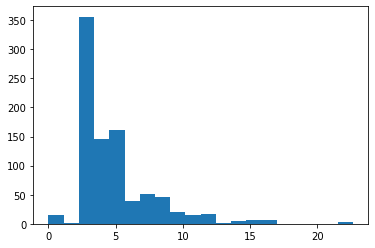

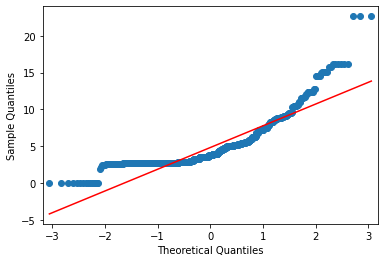

In [31]:
test_normality(data=df_passengers.Fare.apply(lambda Fare: np.sqrt(Fare)), bins=20)

Shapiro: 4.881414735957935e-22
Normal test: 2.9145248782541248e-15
Kstest: 0.0
Anderson: AndersonResult(statistic=28.30408298802081, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


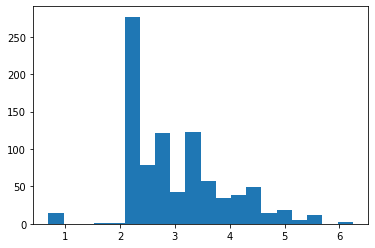

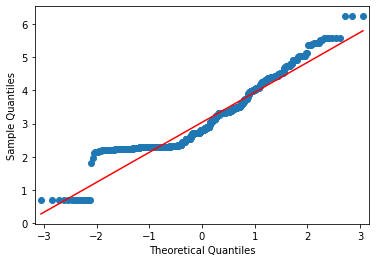

In [32]:
Fare = df_passengers.Fare
min_fare = sorted(Fare.unique())[1]
Fare = Fare.apply(lambda Fare: np.log(Fare + min_fare / 2))
mean_fare = Fare.mean()
std_fare = Fare.std()
Fare.apply(lambda Fare: (Fare - mean_fare) / std_fare)
test_normality(data=Fare, bins=20)

Shapiro: 6.641983649504133e-22
Normal test: 2.2062461110567143e-09
Kstest: 2.7087086499814676e-18
Anderson: AndersonResult(statistic=26.16684640028302, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


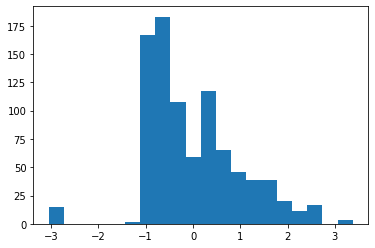

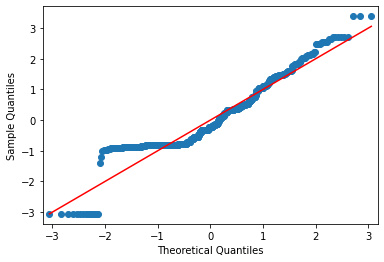

In [33]:
Fare = df_passengers.Fare
Fare = Fare.apply(lambda Fare: np.log(Fare + 1))
mean_fare = Fare.mean()
std_fare = Fare.std()
Fare = Fare.apply(lambda Fare: (Fare - mean_fare) / std_fare)
test_normality(data=Fare, bins=20)

Shapiro: 2.7460046162351684e-22
Normal test: 8.147507760164392e-08
Kstest: 3.916899968643525e-18
Anderson: AndersonResult(statistic=23.158788702125094, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


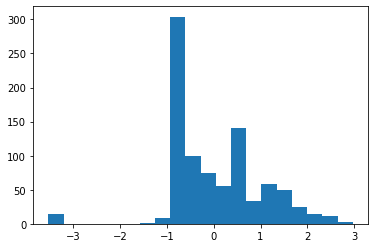

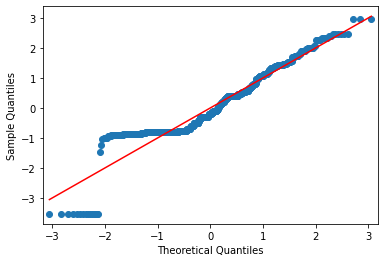

In [34]:
from scipy.stats import yeojohnson

Fare = df_passengers.Fare
Fare, _ = yeojohnson(Fare)
mean_fare = Fare.mean()
std_fare = Fare.std()
Fare = (Fare - mean_fare) / std_fare
test_normality(data=Fare, bins=20)

Shapiro: 2.7460046162351684e-22
Normal test: 8.147507760164423e-08
Kstest: 3.916899968643525e-18
Anderson: AndersonResult(statistic=23.158788702125094, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


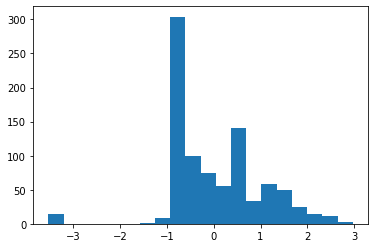

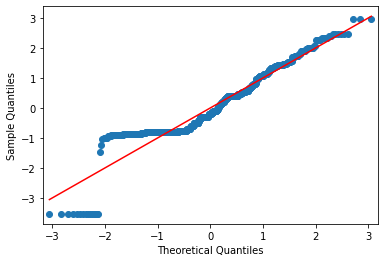

In [35]:
from scipy.stats import boxcox

Fare = df_passengers.Fare
Fare, _ = boxcox(Fare + 1)
mean_fare = Fare.mean()
std_fare = Fare.std()
Fare = (Fare - mean_fare) / std_fare
test_normality(data=Fare, bins=20)

For the moment, let's keep logarithm transformation

In [36]:
df_passengers.Fare = df_passengers.Fare.apply(lambda Fare: np.log(Fare + 1))
mean_fare = df_passengers.Fare.mean()
std_fare = df_passengers.Fare.std()
df_passengers.Fare = df_passengers.Fare.apply(lambda Fare: (Fare - mean_fare) / std_fare)

## 2.10. Cabin

Cabin represent the Cabin number

In [37]:
df_passengers.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
df_passengers.Cabin.isna().mean()

0.7710437710437711

In [39]:
df_passengers["Has_a_cabin"] = df_passengers.Cabin.notna()

In [40]:
df_passengers.drop(labels=["Cabin"], axis=1, inplace=True)

## 2.11. Embarked

Embarked is the port of embarkation

In [41]:
df_passengers.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [42]:
df_passengers.Embarked.isna().sum()

2

For this moment, let's fill missing embarkation with 'M'

In [43]:
df_passengers.Embarked = df_passengers.Embarked.fillna('M')

In [44]:
df_passengers = pd.get_dummies(df_passengers, columns=["Embarked"])